<a href="https://colab.research.google.com/github/ghulam2545/deep_learning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = '/content/drive/MyDrive/dataset/chest_xray/train'
val_dir = '/content/drive/MyDrive/dataset/chest_xray/val'
test_dir = '/content/drive/MyDrive/dataset/chest_xray/test'

In [3]:
data_generator = ImageDataGenerator(
    rescale=1.0 / 255,
)

In [4]:
train_ds = data_generator.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=64,
    class_mode='binary',
    shuffle=True
)

Found 5163 images belonging to 2 classes.


In [5]:
val_ds = data_generator.flow_from_directory(
    val_dir,
    target_size=(200, 200),
    batch_size=64,
    class_mode='binary',
    shuffle=True
)

Found 16 images belonging to 2 classes.


In [6]:
test_ds = data_generator.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=64,
    class_mode='binary',
    shuffle=True
)

Found 613 images belonging to 2 classes.


In [7]:
x_batch, y_batch = train_ds.next()

print(x_batch.shape)
print(y_batch.shape)

(64, 200, 200, 3)
(64,)


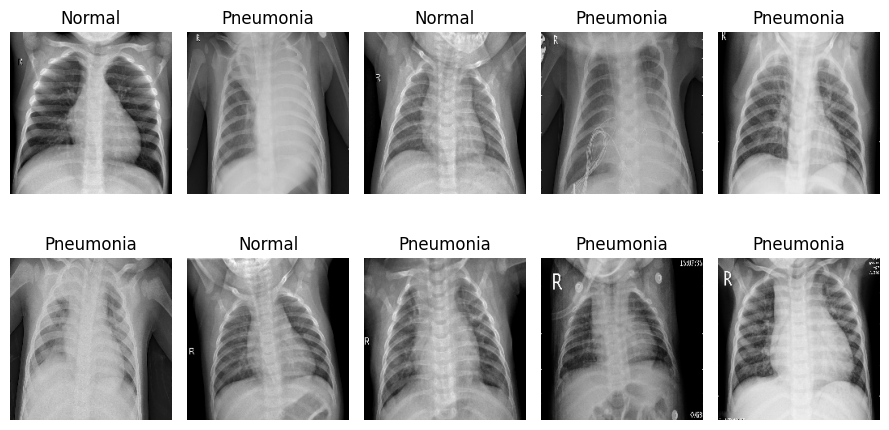

In [8]:
# lookup at some training image

plt.figure(figsize=(9, 5))
for i in range(2*5):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_batch[i])
  plt.title('Normal' if int(y_batch[i]) == 0 else 'Pneumonia')
  plt.axis('off')
plt.tight_layout()
plt.show()  

In [9]:
model = keras.Sequential([
    layers.Input(shape=(200, 200, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(80, activation='relu'),
    layers.Dense(1)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 80)                2

In [11]:
my_optz = keras.optimizers.Adam(learning_rate=0.001)
my_loss = keras.losses.BinaryCrossentropy(from_logits=True)
model.compile(optimizer=my_optz, loss=my_loss, metrics=['accuracy'])

In [12]:
model.fit(
    train_ds,
    batch_size=64,
    epochs=5,
)


Epoch 1/5
81/81 [==============================] - 416s 5s/step - loss: 0.3469 - accuracy: 0.8501
Epoch 2/5
81/81 [==============================] - 70s 862ms/step - loss: 0.0913 - accuracy: 0.9642
Epoch 3/5
81/81 [==============================] - 68s 833ms/step - loss: 0.0716 - accuracy: 0.9719
Epoch 4/5
81/81 [==============================] - 68s 845ms/step - loss: 0.0614 - accuracy: 0.9748
Epoch 5/5
81/81 [==============================] - 75s 925ms/step - loss: 0.0415 - accuracy: 0.9857


In [13]:
history = model.evaluate(test_ds, batch_size=64)

10/10 [==============================] - 143s 16s/step - loss: 1.2478 - accuracy: 0.7700


In [14]:
# plt.figure(figsize =(10, 6))
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.ylim((0, 1))
# plt.legend(['Train', 'Test'], loc='upper left');

In [19]:
sample = test_ds.next()

In [20]:
x_test, y_test = sample

x_test.shape, y_test.shape

((64, 200, 200, 3), (64,))

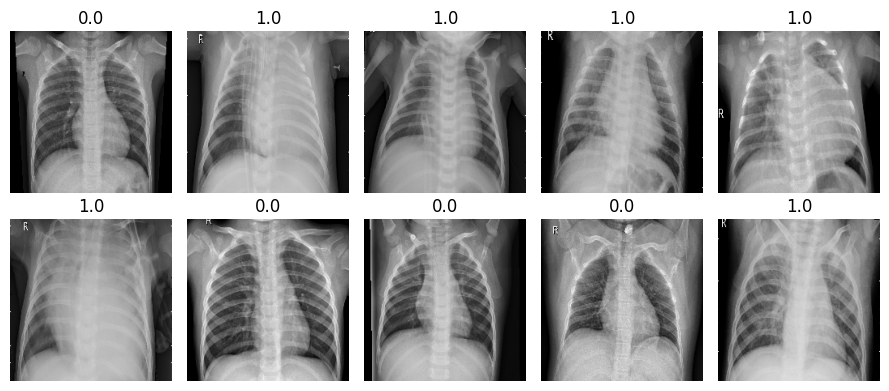

In [22]:
# lookup at some test images

plt.figure(figsize=(9, 4))
for i in range(2*5):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i])
  plt.title(y_test[i])
  plt.axis('off')
plt.tight_layout()
plt.show()  

In [23]:
pred = model.predict(x_test)

for i in pred[:10]:
  print(0 if i < 0.5 else 1, end=', ')

2/2 [==============================] - 0s 13ms/step
0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 